Création des plots et des comparaisons

In [25]:
import numpy as np
import os 
import json

rewardfolder = "./TD3_Maison_jsons/jsonsRewardMean/"
actorLossfolder = "./TD3_Maison_jsons/jsonsActorLoss/"

rewardFiles = os.listdir(rewardfolder)
actorLossFiles = os.listdir(actorLossfolder)

allRewards = []
allActorLoss = []

for i in range(len(rewardFiles)):
    # retrive rewards (List)
    with open(rewardfolder + rewardFiles[i], 'r') as f:
        rewards = json.load(f)
    rewards = np.array(rewards)
    allRewards.append(rewards)

    # retrive actor loss (List)
    with open(actorLossfolder + actorLossFiles[i], 'r') as f:
        actorLoss = json.load(f)
    actorLoss = np.array(actorLoss)
    allActorLoss.append(actorLoss)



In [26]:

allRewards = np.array(allRewards)
rewardSteps = allRewards[:,:,1]
rewardValue = allRewards[:,:,2]

allActorLoss = np.array(allActorLoss)
actorLossSteps = allActorLoss[:,:,1]
actorLossValue = allActorLoss[:,:,2]


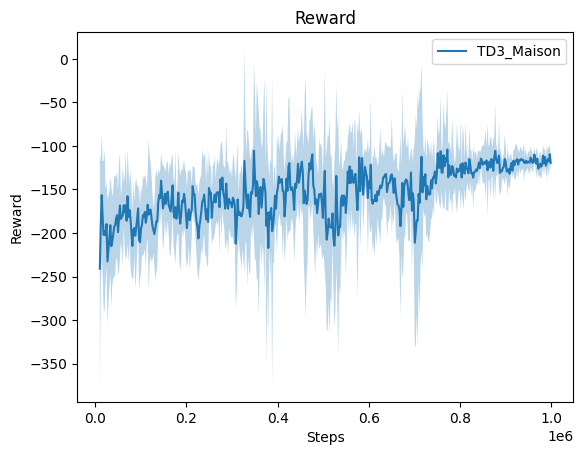

In [27]:

# plot rewards
import matplotlib.pyplot as plt

span = 100
padding = span//2 -1
plt.figure()

rewardmean = np.mean(rewardValue, axis=0)
rewardstd = np.std(rewardValue, axis=0)

plt.plot(rewardSteps[0], rewardmean, label='TD3_Maison')
plt.fill_between(rewardSteps[0], rewardmean - rewardstd, rewardmean + rewardstd, alpha=0.3)

plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward Mean')
plt.show()





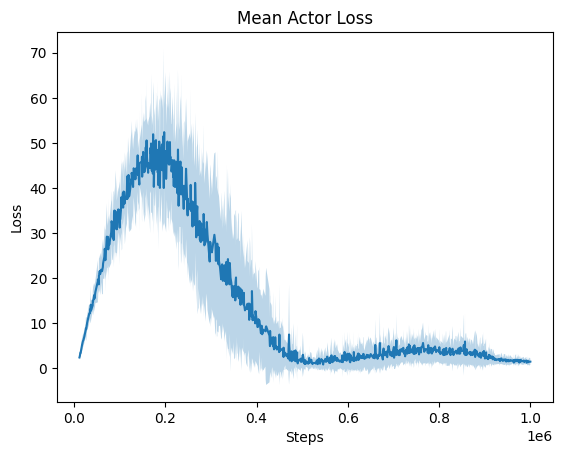

In [28]:

# plot actor loss
plt.figure()
actorLossmean = np.mean(actorLossValue, axis=0)
actorLossstd = np.std(actorLossValue, axis=0)

plt.plot(actorLossSteps[0], actorLossmean, label='TD3_Maison')
plt.fill_between(actorLossSteps[0], actorLossmean - actorLossstd, actorLossmean + actorLossstd, alpha=0.3)

plt.title("Mean Actor Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.show()



Text(0.5, 1.0, 'Reward Mean')

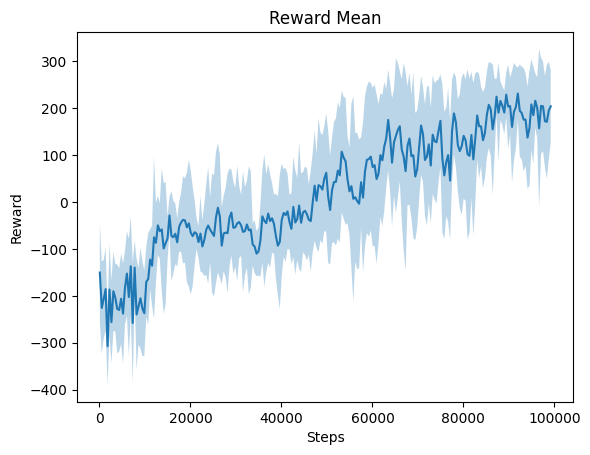

In [29]:
from stable_baselines3.common.results_plotter import load_results, ts2xy
from stable_baselines3.common import results_plotter as rp
from scipy.interpolate import interp1d

logs_dir = ['tmp/run0/', 'tmp/run1/', 'tmp/run2/', 'tmp/run3/', 'tmp/run4/', 'tmp/run5/', 'tmp/run6/', 'tmp/run7/', 'tmp/run8/', 'tmp/run9/']

data_frames = []
for folder in logs_dir:
    data_frame = load_results(folder)
    data_frame = data_frame[data_frame.l.cumsum() <= 1e5]
    data_frames.append(data_frame)
xy_list = [ts2xy(data_frame, rp.X_TIMESTEPS) for data_frame in data_frames]
stepscount, rewards = zip(*xy_list)

min_length = min(len(reward) for reward in rewards)

# Interpolate each reward array to match the minimum length
interpolated_rewards = []
for i, reward in enumerate(rewards):
    # Create an interpolation function for rewards[i]
    interp_func = interp1d(stepscount[i], reward, kind='linear', fill_value="extrapolate")
    
    # Generate the new x values based on the smallest step count
    new_steps_sb3 = np.linspace(stepscount[i][0], stepscount[i][-1], min_length)
    
    # Apply the interpolation function
    new_rewards = interp_func(new_steps_sb3)
    interpolated_rewards.append(new_rewards)

# Calculate the mean of the interpolated rewards
rewards_mean_sb3 = np.mean(interpolated_rewards, axis=0)
rewards_std_sb3 = np.std(interpolated_rewards, axis=0)

plt.figure()
plt.plot(new_steps_sb3, rewards_mean_sb3)
plt.fill_between(new_steps_sb3, rewards_mean_sb3 - rewards_std_sb3, rewards_mean_sb3 + rewards_std_sb3, alpha=0.3)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward Mean SB3')






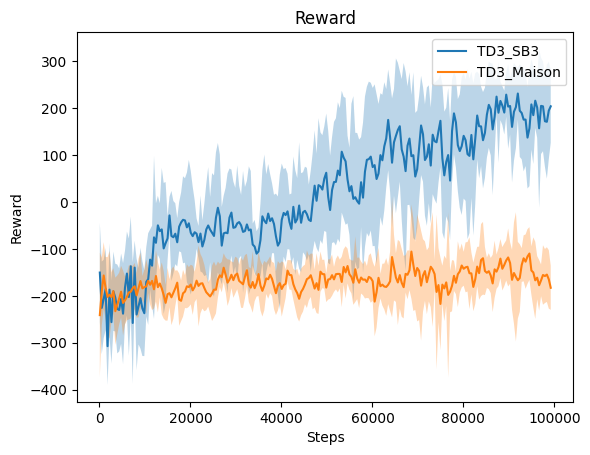

In [30]:
# crop the TD3_Maison data to match the TD3_SB3 data
rewardmean = rewardmean[:len(rewards_mean_sb3)]
rewardstd = rewardstd[:len(rewards_mean_sb3)]



# Merge the two plots
plt.figure()
plt.plot(new_steps_sb3, rewards_mean_sb3, label='TD3_SB3')
plt.fill_between(new_steps_sb3, rewards_mean_sb3 - rewards_std_sb3, rewards_mean_sb3 + rewards_std_sb3, alpha=0.3)
plt.plot(new_steps_sb3, rewardmean, label='TD3_Maison')
plt.fill_between(new_steps_sb3, rewardmean - rewardstd, rewardmean + rewardstd, alpha=0.3)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward')
plt.legend()
plt.show()
